####  목표 : 0~9까지의 손글씨 이미지 데이터를 분류하는 모델을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 데이터를 임포트
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data()

In [3]:
len(data)

2

In [4]:
# 데이터가 3차원 배열로 크게는 train, test로 나뉘어져 있고
# 각 train,test 안에 문제와 정답 데이터로 한번 더 나뉘어져 있음
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# 이미지라는 2차원 데이터를 다루기 때문에 shape의 형태가 3칸이 나오게 됨
# (데이터의 수, 가로픽셀 수, 세로픽셀 수)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

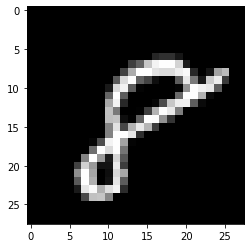

In [9]:
plt.imshow(X_train[59999], cmap='gray')
# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap = 'gray' : 이미지를 흑백으로 전환시켜주는 명령

- 정답 데이터를 인코딩 하는 이유
    - 1. 레이블 값이 3개 이상일 경우 기계가 이해하기 위해 0또는 1로 변경하여 입력
    - 2. 신경망 출력층에서 각 레이블 값들에 대한 확률 정보를 확인하여 최종 예측에 반영하기 위해서
    - pd.get_dummies : 원핫인코딩
    - to_categorical:keras에서 지원해주는 인코딩 명령(=원핫인코딩)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
# y_train, y_test를 원핫인코딩 하기!
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
y_train_one_hot.shape

(60000, 10)

In [14]:
y_train.shape

(60000,)

In [24]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)


- 신경망에는 2차원인 이미지 데이터를 한번에 넣을 수 가 없기 때문에 데이터의 차원을 1차원으로 변경시켜줘서 넣어야 함 :reshape 

In [30]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
# -1 : 28*28 자동 계산// 즉 60000을 제외한 나머지값들을 다 곱해서 일렬로 펴줌
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

In [33]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#  신경망 구조를 직접 설계해보자!

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# 1. 신경망 구조 설계
# 출력층의 뉴런 개수 / 출력층의 활성화 함수 종류

### 신경망 구조 설계

In [36]:
#1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층(Dense)
# 첫 입력층(데이터의 특성 개수) input_dim(17) , 10(다음 층 뉴런 10개)
# activation : 활성화함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)

model.add(Dense(800, input_dim=784, activation="sigmoid"))

# 중간층
model.add(Dense(800, activation="sigmoid")) # 하나의 층

# 출력층
# 출력층은 회귀(활성화함수x), 2진분류(sigmoid), 다중분류에 따라서 사용하는 함수가 달라짐
# 출력층 뉴런개수 : 정답데이터를 원핫인코딩한 데이터 개수
model.add(Dense(10, activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 2. 학습/평가 방법 설정
# loss값 categorical_crossentropy로 설정

### 신경망 학습/평가 방법 설정

In [38]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="categorical_crossentropy",  
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

###  학습 및 학습과정 

In [41]:
h = model.fit(X_train,y_train_one_hot,
              epochs=100,  # epochs : 학습 횟수를 설정
              verbose = 1) 
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0562 - acc: 0.9811
Epoch 2/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0589 - acc: 0.9808
Epoch 3/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0564 - acc: 0.9821
Epoch 4/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0615 - acc: 0.9795
Epoch 5/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0555 - acc: 0.9821
Epoch 6/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0549 - acc: 0.9826
Epoch 7/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0555 - acc: 0.9817
Epoch 8/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0569 - acc: 0.9818
Epoch 9/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0609 - acc: 0.98071s - los - ETA: 0s - loss: 0.0603 -
Epoch 10/100
60

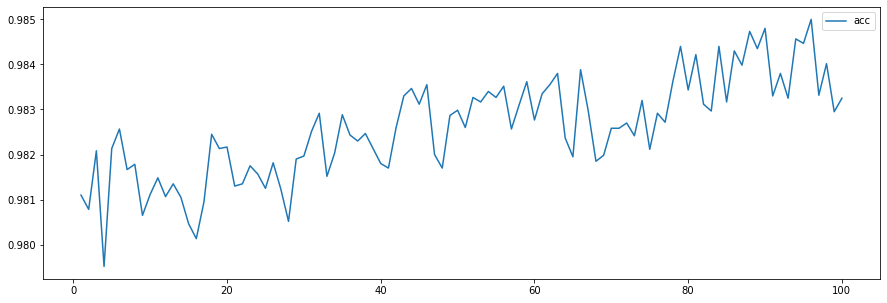

In [46]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
        h.history['acc'],
        label = 'acc'
        )
plt.legend()
plt.show()

#### 과대적합을 확인하기 위해 train데이터에서 검증셋을 분리해서 학습시 같이 출력시켜보자!

In [50]:
# 무조건 train, test, 셋만 나눠주는게 아니라 데이터를 일정 비율로 나누어주는 명령
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train,
                                                                 y_train_one_hot,
                                                                 random_state=3)

In [54]:
print(X_train.shape)
print(X_val.shape)                   # 검증용 문제
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)           # 검증용 정답

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [55]:
#1. 신경망 구조 설계
model1 = Sequential()

# 입력층(input_dim) + 중간층(Dense)
# 첫 입력층(데이터의 특성 개수) input_dim(17) , 10(다음 층 뉴런 10개)
# activation : 활성화함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)

model1.add(Dense(800, input_dim=784, activation="sigmoid"))

# 중간층
model1.add(Dense(800, activation="sigmoid")) # 하나의 층

# 출력층
# 출력층은 회귀(활성화함수x), 2진분류(sigmoid), 다중분류에 따라서 사용하는 함수가 달라짐
# 출력층 뉴런개수 : 정답데이터를 원핫인코딩한 데이터 개수
model1.add(Dense(10, activation="softmax")) 

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model1.compile(loss="categorical_crossentropy",  
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [64]:
h1 = model1.fit(X_train,y_train_one_hot,
              epochs=30,  # epochs : 학습 횟수를 설정
              validation_data = (X_val, y_val_one_hot)) # 검증용 데이터셋을 추가해주는 명령
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 3s 77us/sample - loss: 0.4175 - acc: 0.8737 - val_loss: 0.3453 - val_acc: 0.8924
Epoch 2/30
45000/45000 [==============================] - 3s 69us/sample - loss: 0.3078 - acc: 0.9028 - val_loss: 0.2728 - val_acc: 0.9156
Epoch 3/30
45000/45000 [==============================] - 3s 69us/sample - loss: 0.2641 - acc: 0.9168 - val_loss: 0.2900 - val_acc: 0.9109
Epoch 4/30
45000/45000 [==============================] - 3s 69us/sample - loss: 0.2317 - acc: 0.9278 - val_loss: 0.2158 - val_acc: 0.9329
Epoch 5/30
45000/45000 [==============================] - 3s 70us/sample - loss: 0.2127 - acc: 0.9342 - val_loss: 0.2112 - val_acc: 0.9323
Epoch 6/30
45000/45000 [==============================] - 3s 69us/sample - loss: 0.2000 - acc: 0.9372 - val_loss: 0.2382 - val_acc: 0.9282
Epoch 7/30
45000/45000 [==============================] - 3s 70us/sample - loss: 0.1819 - acc: 0.9423 - val_loss: 0.

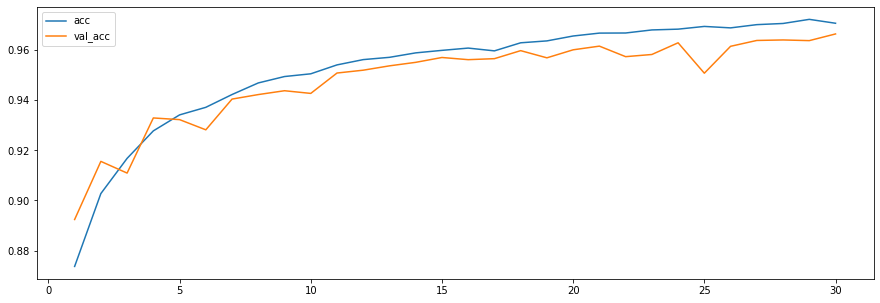

In [65]:
plt.figure(figsize=(15,5))

plt.plot(range(1,31),
        h1.history['acc'],
        label = 'acc'
        )

plt.plot(range(1,31),
        h1.history['val_acc'],
        label = 'val_acc'
        )
plt.legend()
plt.show()

### 모델평가 

In [66]:
model1.evaluate(X_test,y_test_one_hot)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.1095 - acc: 0.9668


[0.10952503152862192, 0.9668]